In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## Exercise 1

In [2]:
def show_img_plt(img, fig_height=8, fig_width=6, vmin=0, vmax=255):
    plt.figure(figsize=(fig_height, fig_width), dpi=100)
    plt.imshow(img, vmin=vmin, vmax=vmax)

def show_mult_img_plt(rows, columns, img_names, vmin=0, vmax=255):
    fig = plt.figure(figsize=(15, 17), dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img_names[i], vmin=vmin, vmax=vmax)
        plt.axis('off')
        plt.title('img_' + str(i))

def show_mult_img_plt_cmap(rows, columns, img_names,cmap='gray', vmin=0, vmax=255):
    fig = plt.figure(figsize=(15, 17), dpi=100)
    for i in range(len(img_names)):
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img_names[i],cmap=cmap, vmin=vmin, vmax=vmax)
        plt.axis('off')
        plt.title('img_' + str(i))

def show_img_plt_cmap(img,cmap='gray', fig_height=8, fig_width=6, vmin=0, vmax=255):
    plt.figure(figsize=(fig_height, fig_width), dpi=100)
    plt.imshow(img,cmap, vmin=vmin, vmax=vmax)

### Question 3

In [3]:
guassian = np.array([[  50, 60,   90,   0,   0,],
                    [  18, 95,   20,   36,   0,],
                    [   8, 10,    1,   0,   0,],
                    [   6, 20,   40,   20,  80,],
                    [   3,  0,    0,   15,   0,],], np.uint8)
kernel = np.array([[  1, 2, 1],
                   [  2, 4, 2],
                   [  1, 2,  1],], np.uint8)

padding_guassian = cv2.copyMakeBorder(src=guassian, top=1, bottom=1, left=1, right=1, borderType=cv2.BORDER_CONSTANT, value=0)
answer = np.zeros((5,5), np.float32)
answer_rounded = np.zeros((5,5), np.uint8)

# calculate
a = 1/16
for i in range(1, 6):
    for j in range(1, 6):
        answer[i-1][j-1] = (( padding_guassian[i-1][j-1] * 1 ) + ( padding_guassian[i-1][j] * 2 ) + ( padding_guassian[i-1][j+1] * 1 ) + ( padding_guassian[i][j-1] * 2 ) + ( padding_guassian[i][j] * 4 ) + ( padding_guassian[i][j+1] * 2 ) + ( padding_guassian[i+1][j-1] * 1 ) + ( padding_guassian[i+1][j] * 2 ) + ( padding_guassian[i+1][j+1] * 1 )) * (1/16)
        answer_rounded[i-1][j-1] = round(answer[i-1][j-1]) # python using bank rounding 

print(f"answer gaussian kernel without rounding: \n{answer}", f"answer gaussian kernel with rounding: \n{answer_rounded}", sep="\n\n")


answer gaussian kernel without rounding: 
[[28.1875 46.75   40.6875 17.      2.25  ]
 [28.     46.5625 37.125  17.1875  4.5   ]
 [13.4375 23.25   19.6875 15.875  13.5   ]
 [ 6.     12.75   16.6875 21.9375 23.4375]
 [ 2.75    5.75    9.375  13.75   13.125 ]]

answer gaussian kernel with rounding: 
[[28 47 41 17  2]
 [28 47 37 17  4]
 [13 23 20 16 14]
 [ 6 13 17 22 23]
 [ 3  6  9 14 13]]


### Question 4

In [4]:
org_image = np.array([[  50, 60,   90,   0,   0,],
                    [  18, 95,   20,   36,   0,],
                    [   8, 10,    1,   0,   0,],
                    [   6, 20,   40,   20,  80,],
                    [   3,  0,    0,   15,   0,],], np.uint8)

bordered_img = cv2.copyMakeBorder(src=guassian, top=1, bottom=1, left=1, right=1, borderType=cv2.BORDER_CONSTANT, value=0)
answer = np.zeros((5,5), np.uint8)

# calculate
for i in range(1, 6):
    for j in range(1, 6):
        temp = [bordered_img[i-1][j-1], bordered_img[i-1][j], bordered_img[i-1][j+1], bordered_img[i][j-1], bordered_img[i][j], bordered_img[i][j+1], bordered_img[i+1][j-1], bordered_img[i+1][j], bordered_img[i+1][j+1]]
        temp.sort()
        # log for any pixel
        print(f"arr({i-1}, {j-1}) = {temp}")
        answer[i-1][j-1] = temp[4]

print(f"\n\nanswer with Median kernel: \n{answer}")


arr(0, 0) = [0, 0, 0, 0, 0, 18, 50, 60, 95]
arr(0, 1) = [0, 0, 0, 18, 20, 50, 60, 90, 95]
arr(0, 2) = [0, 0, 0, 0, 20, 36, 60, 90, 95]
arr(0, 3) = [0, 0, 0, 0, 0, 0, 20, 36, 90]
arr(0, 4) = [0, 0, 0, 0, 0, 0, 0, 0, 36]
arr(1, 0) = [0, 0, 0, 8, 10, 18, 50, 60, 95]
arr(1, 1) = [1, 8, 10, 18, 20, 50, 60, 90, 95]
arr(1, 2) = [0, 0, 1, 10, 20, 36, 60, 90, 95]
arr(1, 3) = [0, 0, 0, 0, 0, 1, 20, 36, 90]
arr(1, 4) = [0, 0, 0, 0, 0, 0, 0, 0, 36]
arr(2, 0) = [0, 0, 0, 6, 8, 10, 18, 20, 95]
arr(2, 1) = [1, 6, 8, 10, 18, 20, 20, 40, 95]
arr(2, 2) = [0, 1, 10, 20, 20, 20, 36, 40, 95]
arr(2, 3) = [0, 0, 0, 1, 20, 20, 36, 40, 80]
arr(2, 4) = [0, 0, 0, 0, 0, 0, 20, 36, 80]
arr(3, 0) = [0, 0, 0, 0, 3, 6, 8, 10, 20]
arr(3, 1) = [0, 0, 1, 3, 6, 8, 10, 20, 40]
arr(3, 2) = [0, 0, 0, 1, 10, 15, 20, 20, 40]
arr(3, 3) = [0, 0, 0, 0, 1, 15, 20, 40, 80]
arr(3, 4) = [0, 0, 0, 0, 0, 0, 15, 20, 80]
arr(4, 0) = [0, 0, 0, 0, 0, 0, 3, 6, 20]
arr(4, 1) = [0, 0, 0, 0, 0, 3, 6, 20, 40]
arr(4, 2) = [0, 0, 0, 0, 0, 15, 20

### Final Question

In [5]:
org_input_img_jpg = cv2.imread('input.jpg', cv2.IMREAD_UNCHANGED)
org_input_img_png = cv2.imread('input.png', cv2.IMREAD_UNCHANGED)
org_output_img = cv2.imread('output.jpg', cv2.IMREAD_UNCHANGED)

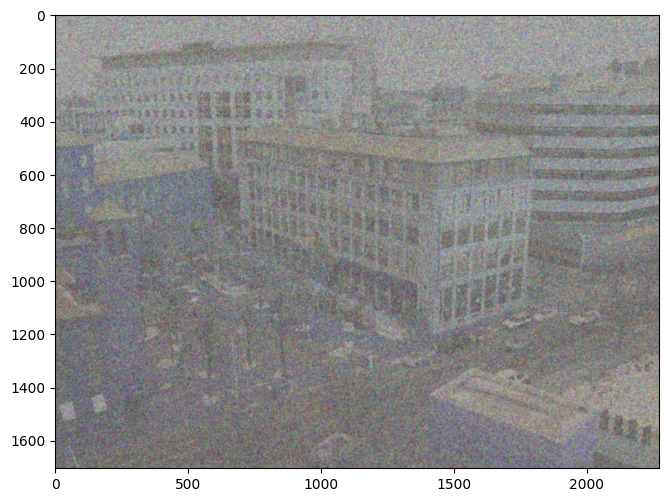

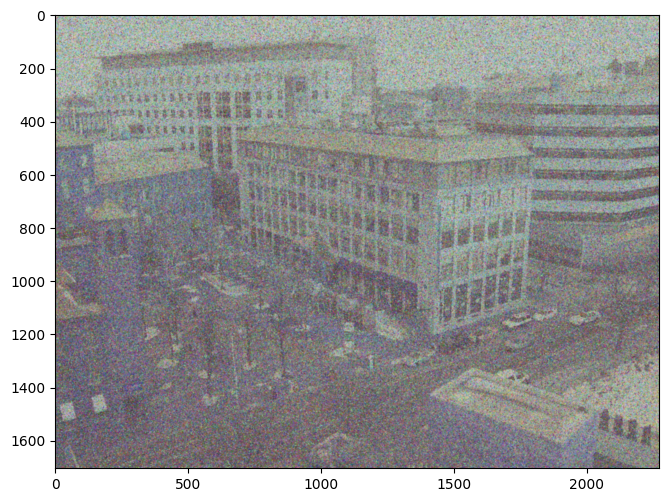

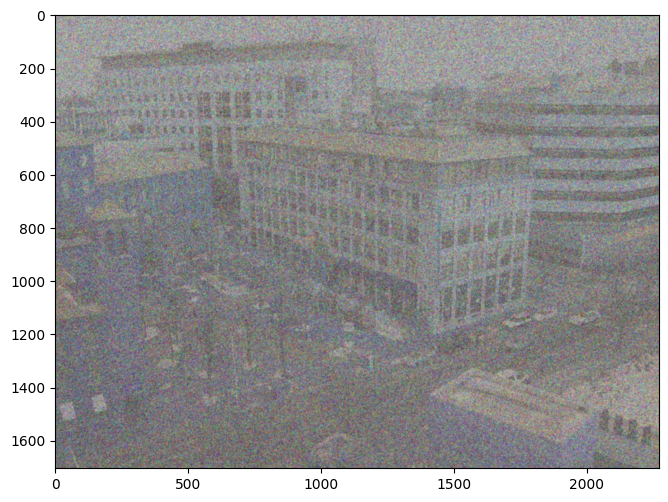

In [6]:
# jpg images
convolved_img = cv2.GaussianBlur(org_input_img_jpg, (9, 9), 0)
convolved_img2 = cv2.medianBlur(org_input_img_jpg, 5) # best denoising method but png images is much better than jpg. so I pick this method for both
convolved_img3 = cv2.blur(org_input_img_jpg, (5, 5))
show_img_plt(convolved_img)
show_img_plt(convolved_img2)
show_img_plt(convolved_img3)

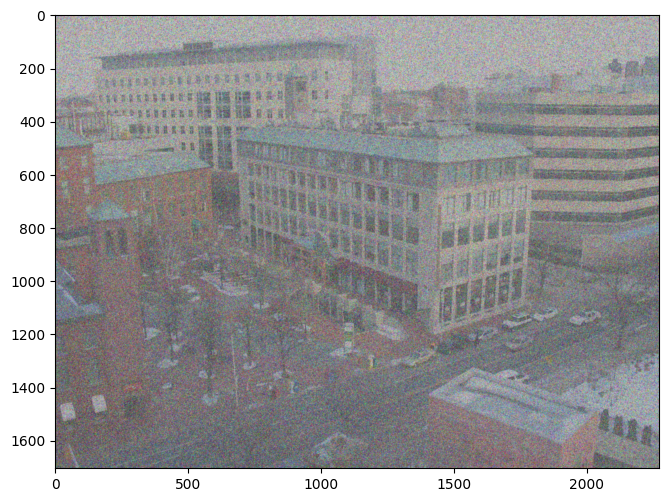

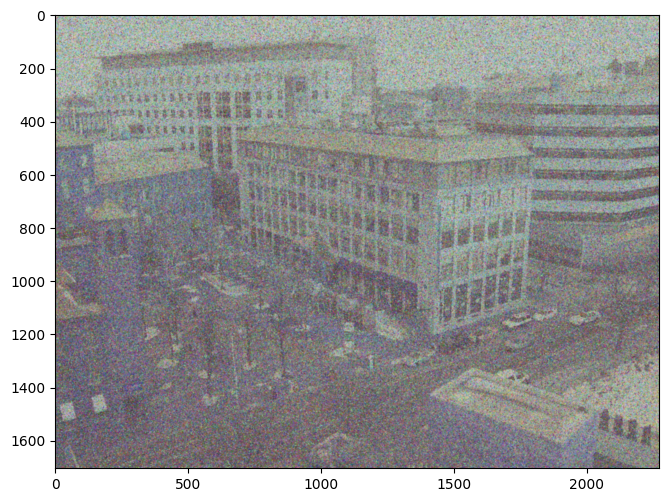

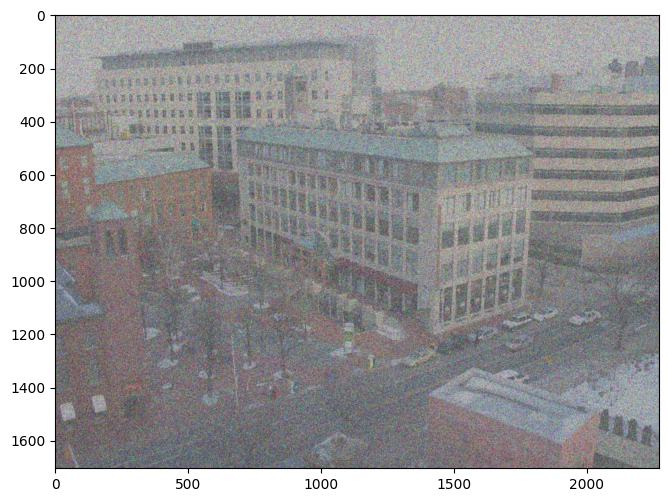

In [7]:
# png images
convolved_img = cv2.GaussianBlur(org_input_img_png, (5, 5), 0)
median_img_output = cv2.medianBlur(org_input_img_png, 5)
convolved_img3 = cv2.blur(org_input_img_png, (3, 3))
show_img_plt(convolved_img)
show_img_plt(convolved_img2)
show_img_plt(convolved_img3)

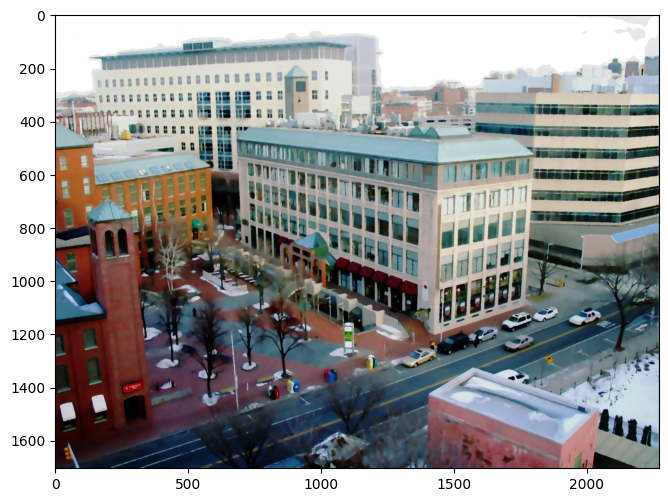

In [8]:
# best method for to achieve that output is first use median filter to remove salt and pepper noise and then use histogram
# equalization to enhance contrast of image

# Why use this method? In this method, we lose details but image is a little brighness.

# step 1: median filter
median_img_output = cv2.medianBlur(org_input_img_png, 5)

# step 2: histogram equaliztion
# Convert the image from BGR to RGB
img = cv2.cvtColor(median_img_output, cv2.COLOR_BGR2RGB)

# Split the image into its RGB channels
r, g, b = cv2.split(img)

# Equalize the histograms of each channel
r_eq = cv2.equalizeHist(r)
g_eq = cv2.equalizeHist(g)
b_eq = cv2.equalizeHist(b)

# Merge the equalized channels back into an RGB image
img_eq = cv2.merge((r_eq, g_eq, b_eq))

# save the image to directory
save = cv2.imwrite('image_output_equalizeHist.png', img_eq)

# Convert the image from RGB to BGR
img = cv2.cvtColor(img_eq, cv2.COLOR_RGB2BGR)

show_img_plt(img)

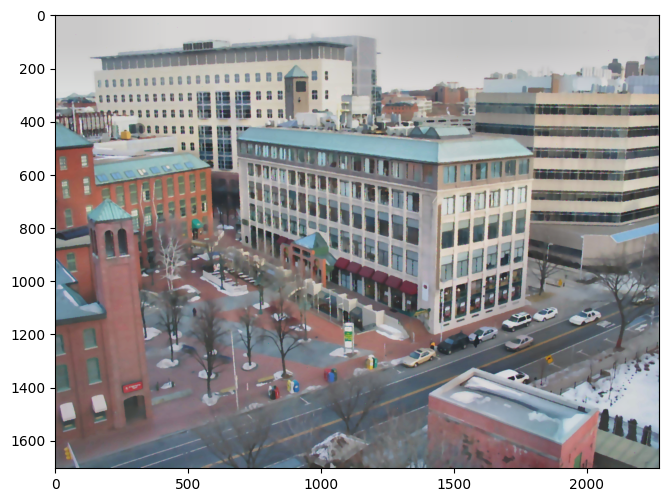

In [9]:
# best method for to achieve that output is first use median filter to remove salt and pepper noise and then use CLAHE
# Why use this method? In this method, we have details but image is a little dark.

# step 1: median filter
median_img_output = cv2.medianBlur(org_input_img_png, 5)

# step 2: histogram equaliztion
# Convert the image from BGR to RGB
img = cv2.cvtColor(median_img_output, cv2.COLOR_BGR2RGB)

# Create a CLAHE object (Arguments are optional and may be adjusted as needed)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))

# Split the image into its RGB channels
r, g, b = cv2.split(img)

# Apply CLAHE to each channel
r_clahe = clahe.apply(r)
g_clahe = clahe.apply(g)
b_clahe = clahe.apply(b)

# Merge the CLAHE enhanced channels back into an RGB image
img_clahe = cv2.merge((r_clahe, g_clahe, b_clahe))

# save the image to directory
save = cv2.imwrite('image_output_clahe.png', img_clahe)

# Convert the image from RGB to BGR
img = cv2.cvtColor(img_clahe, cv2.COLOR_RGB2BGR)

show_img_plt(img)